## 1.Подключение библиотек

In [1]:

import seaborn as sns  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2.Описание задачи
Набор данных состоит из уровней экспрессии 77 белков, которые производили обнаруживаемые сигналы в коре головного мозга. Существует 38 контрольных мышей и 34 трисомных мыши (с синдромом Дауна), в общей сложности 72 мыши. В
экспериментах было проведено 15 измерений каждого белка на образец/мышь. Поэтому для контрольных мышей имеется
38×15 или 570 измерений, а для трисомных мышей - 34×15 или 510 измерений. Набор данных содержит в общей сложности 1080
измерений на каждый белок. Каждое измерение рассматривается как независимый эксперимент. 


Восемь классов мышей описаны на основе таких особенностей, как **генотип, поведение и лечение.**

**По генотипу:**
<ul>
<li>контрольные</li>
<li>трисомические</li>
</ul>

**Согласно поведению:**
<ul>
<li>некоторые мыши были стимулированы к обучению (context-shock)</li>
<li>другие нет(shock-context)</li>
</ul>

**И для того, чтобы оценить влияние лекарственного мемантина на восстановление способности учиться у
трисоматических мышей:**
<ul>
<li>некоторым мышам вводили препарат</li>
<li>другим нет</li>
</ul>

**Классы:** 

* **c-CS-s:** контрольные мыши, стимулированные к обучению, инъецированные физиологическим раствором (9 мышей) 
    
* **c-CS-m:** контрольные мыши, стимулированные к обучению, инъецированные мемантином (10 мышей) 
    
* **c-SC-s:** контрольные мыши, не стимулированные к обучению, инъецированные физиологическим раствором (9 мышей) 
     
* **c-SC-m:** контрольные мыши, не стимулированные к обучению, инъецированные мемантином (10 мышей) 

* **t-CS-s:** трисомические мыши, стимулированные к обучению, инъецированные физиологическим раствором (7 мышей) 
    
* **t-CS-m:** трисомические мыши, стимулированные к обучению, инъецированные мемантином (9 мышей) 
    
* **t-SC-s:** трисомические мыши, не стимулированные к обучению, инъецированные физиологическим раствором (9 мышей) 
    
* **t-SC-m:** трисомические мыши, не стимулированные к обучению, инъецированные мемантином (9 мышей) 

### Цель:  идентифицировать подмножества белков, которые являются дискриминантами между классами

#### Описание признаков с краткой характеристикой:
* **ID** мыши
* Значения уровней экспрессии **77 белков**
* Генотип: контроль **(c)** или трисомия **(t)**
* Тип лечения: мемантин **(m)** или физиологический раствор **(s)** 
* Поведение: context-shock (CS) или shock-context (SC) 
* Класс: **c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m**


## 3.Загрузка данных

Посмотрим на размерность данных:

In [2]:
data = pd.read_csv(r"C:\Users\user\Documents\GitHub\Mashine-Learning\Mashine-Learning\Data_Cortex_Nuclear(csv).csv")
data.shape

(1080, 82)

В таблице находятся 1080 объектов, посмотрим какой вид они имеют.

In [3]:
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [4]:
data.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

Проверим наличие категориальных признаков.

In [5]:
data.describe(include = ['object'])

,MouseID,Genotype,Treatment,Behavior,class
count,1080,1080,1080,1080,1080
unique,1080,2,2,2,8
top,3423_7,Control,Memantine,S/C,c-SC-m
freq,1,570,570,555,150



Т.к. **class** представляет объединение признаков **MouseID**, **Genotype**, **Treatment** - удалим их для исключения из дальнейшей обработки.


In [6]:
df_data = data.drop(columns=['MouseID', 'Genotype', "Treatment", "Behavior"])
df_data.shape

(1080, 78)

In [7]:
df_data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,c-CS-m


## 4.Визуализация данных и вычисление основных характеристик
Как можно видеть большая часть признаков нормализованна, однако некоторые (например **CaNA_N, pCAMKII_N**) имеют гораздо большие значения и в будущем могут потребовать нормализации.

In [8]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


Так как в данном наборе данных представлено довольно большое число признаков(**77 белков**), то визуализируем лишь некоторые из них: **NR2A_N, BDNF_N, pCAMKII_N**.

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


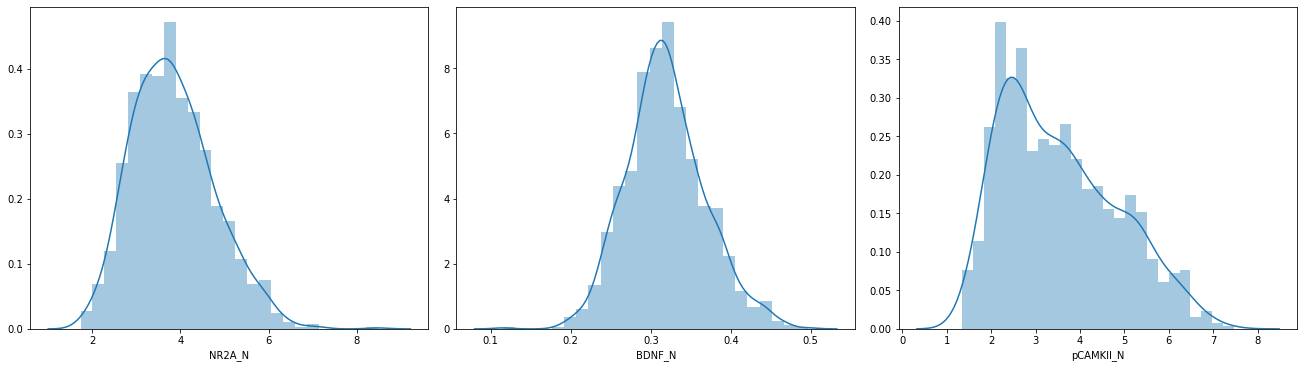

In [9]:
fig, ax = plt.subplots(1,3, figsize=(18,5), constrained_layout=True)

sns.distplot(data['NR2A_N'], bins=25, ax=ax[0])
sns.distplot(data['BDNF_N'], bins=25, ax=ax[1])
sns.distplot(data['pCAMKII_N'], bins=25, ax=ax[2])

Из приведённых графиков видно, что значения признаков распределены довольно компактно и либо нормированы, либо расположены комфортно для данной операции. Часть оставшихся признаков визуализируем с помощью **pairplot**, для этого сгенерируем небоьшую подвыборку.

In [10]:
subset = np.random.choice(np.arange(data.shape[0]), size=100, replace=False)

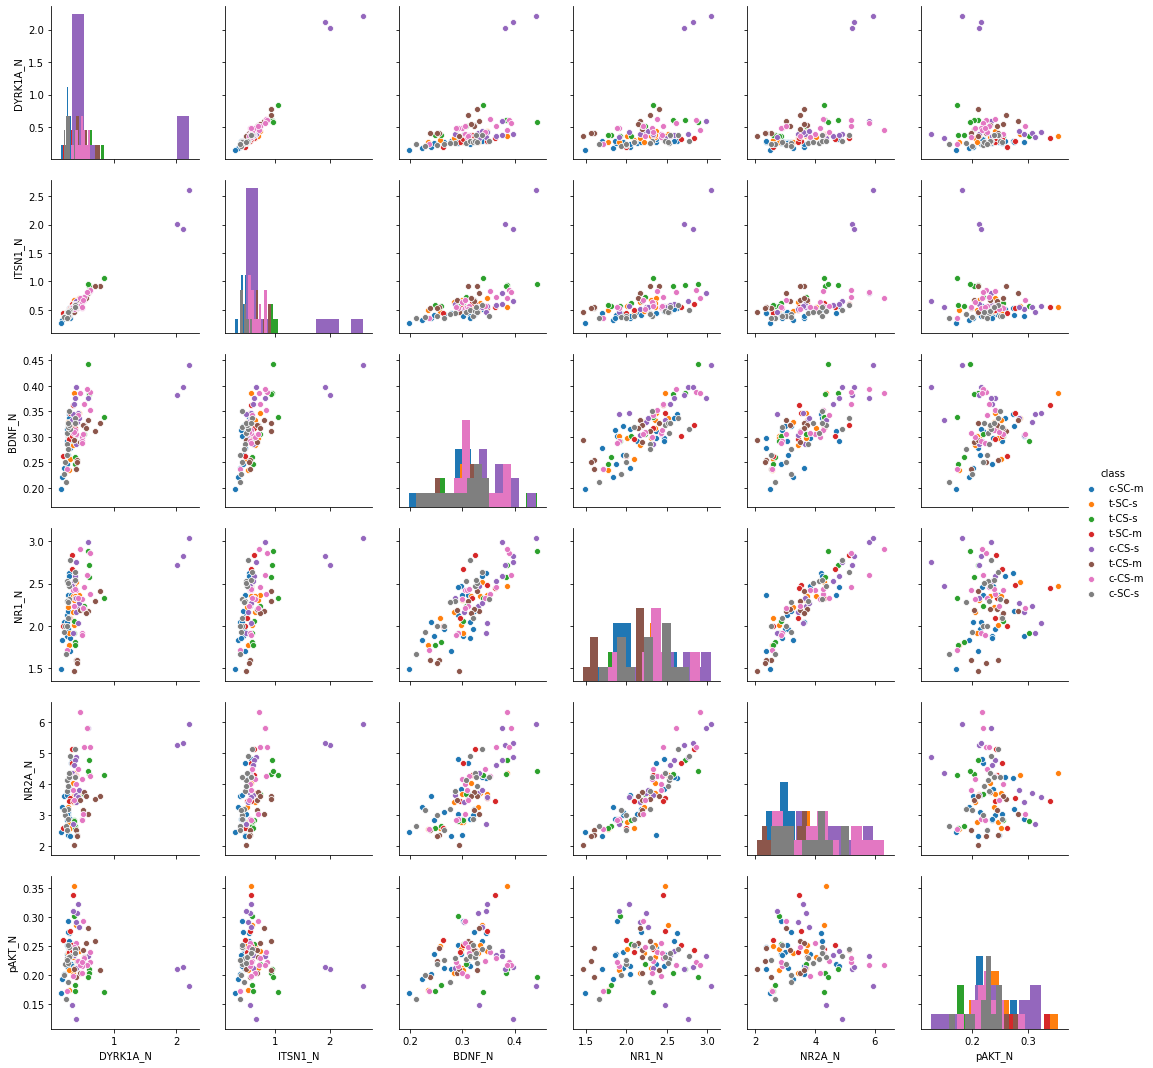

In [11]:
temp_data = data[['DYRK1A_N', 'ITSN1_N', 'BDNF_N',
       'NR1_N', 'NR2A_N', 'pAKT_N','class']]

sns.pairplot(temp_data.iloc[subset], diag_kind='hist', hue='class')

Визуально кореляция наблюдается лишь у небольшой части признаков. Возможно для части из них графики не построены
либо они не имеют линейной зависимости как таковой. Чтобы убедиться в наших предположениях посчитаем и построем
матрицу корреляции. 

In [12]:
temp_corr_data = df_data

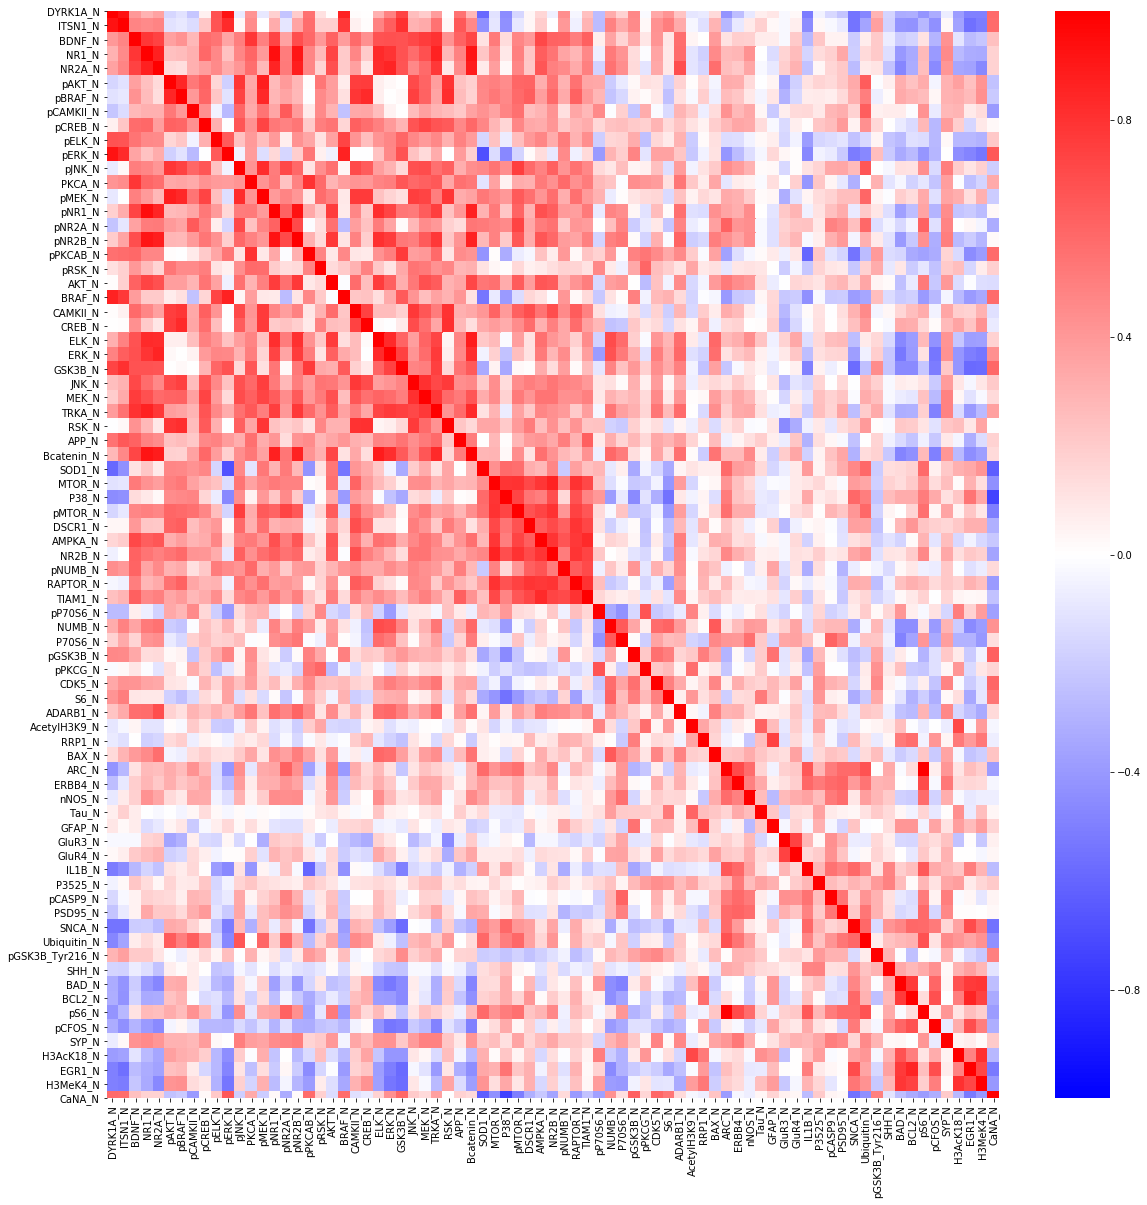

In [13]:
plt.rcParams['figure.figsize'] = (20, 20)

corr = temp_corr_data.corr(method='spearman')

sns.heatmap(corr, center=0, annot=False, cmap='bwr', vmin=-1, vmax=1,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Весьма интересно, что чётко выделены целые группы коррелирующих призаков. Выведем отдельно список пар
для которых корреляция особенно велика(**больше 0,9 по модулю**).

In [14]:
corr.where(np.triu((corr > 0.9) | (corr < -0.9), k=1)).stack().sort_values(ascending=False)

ARC_N     pS6_N         1.000000
NR1_N     pNR1_N        0.942449
DYRK1A_N  ITSN1_N       0.928840
          pERK_N        0.925269
pNR1_N    pNR2B_N       0.922490
NR1_N     Bcatenin_N    0.916395
          pNR2B_N       0.906904
dtype: float64

In [15]:
corr.where(np.triu((corr > 0.7) | (corr < -0.7), k=1)).stack().shape[0]

126

В целом же видно, что число коррелирующих признаков довольно велико и в дальнейшем возможно потребуется их обработка.

## 6.Обработка пропущенных значений
Проверим присутствуют ли в наборе данных пропущенные значения. Отсортируем и выведем первые 15 признаков, если таковые имеются.

In [16]:
df_data.isna().sum().sort_values(ascending = False).head(15)

BCL2_N        285
H3MeK4_N      270
BAD_N         213
EGR1_N        210
H3AcK18_N     180
pCFOS_N        75
Bcatenin_N     18
ELK_N          18
MEK_N           7
NR2B_N          3
GSK3B_N         3
AKT_N           3
BRAF_N          3
CAMKII_N        3
CREB_N          3
dtype: int64

Количество столбцов с пустыми значениями весьма велико.
Удалим признаки у которых количество пропущенных значений превышает **20**. Остальные пропущенные значения
заполним высчитав среднее для каждого из признаков. 

In [17]:
df_data_clean = df_data.drop(columns=pd.DataFrame(df_data.isna().sum().sort_values(ascending = False)).index[:6])
df_data_clean.shape

(1080, 72)

In [18]:
df_data_clean.isna().sum().sort_values(ascending = False).head(15)

Bcatenin_N    18
ELK_N         18
MEK_N          7
pMTOR_N        3
ERK_N          3
AKT_N          3
BRAF_N         3
CAMKII_N       3
CREB_N         3
JNK_N          3
GSK3B_N        3
pPKCAB_N       3
TRKA_N         3
RSK_N          3
APP_N          3
dtype: int64

In [19]:
df_data_clean.median(axis = 0)

DYRK1A_N           0.366378
ITSN1_N            0.565782
BDNF_N             0.316564
NR1_N              2.296546
NR2A_N             3.760855
                     ...   
pGSK3B_Tyr216_N    0.849858
SHH_N              0.224000
pS6_N              0.121626
SYP_N              0.448459
CaNA_N             1.317441
Length: 71, dtype: float64

Заполняем пропущенные значение высчитанной медианой для каждого признака.

In [20]:
clean_data = df_data_clean.fillna(data.median(axis = 0), axis = 0)

In [21]:
clean_data.isna().sum().sort_values(ascending = False).head(15)

class         0
CaNA_N        0
AKT_N         0
BRAF_N        0
CAMKII_N      0
CREB_N        0
ELK_N         0
ERK_N         0
GSK3B_N       0
JNK_N         0
MEK_N         0
TRKA_N        0
RSK_N         0
APP_N         0
Bcatenin_N    0
dtype: int64

## 7.Обработка категориальных признаков

Единственный оставшийся категориальный признак преобразуем в новой числовой. Каждому классу из **c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m** присвоим соответствующий целый номер от **0** до **7**.

In [22]:
clean_data['class'] = pd.Categorical(clean_data['class'])
clean_data['class_code'] = clean_data['class'].cat.codes
clean_data.tail()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,class,class_code
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,2.578046,0.167181,1.261651,0.962942,0.275547,0.115806,0.374088,1.364823,t-SC-s,7
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,2.534347,0.169592,1.254872,0.983690,0.283207,0.113614,0.375259,1.364478,t-SC-s,7
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,2.544515,0.179692,1.242248,0.976609,0.290843,0.118948,0.422121,1.430825,t-SC-s,7
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,2.609769,0.185037,1.301071,0.989286,0.306701,0.125295,0.397676,1.404031,t-SC-s,7
1079,0.302626,0.461059,0.256564,2.092790,2.594348,0.251001,0.191811,2.361816,0.223632,1.064085,...,2.526372,0.184516,1.267120,1.020383,0.292330,0.118899,0.420347,1.370999,t-SC-s,7


Категориальный признак **class** удалим из обработки.

In [23]:
final_clean_data = clean_data.drop(columns=["class"])
final_clean_data.shape

(1080, 72)

## 8.Нормализация количественных признаков

Анализируемые признаки находятся в разных числовых диапазонах, для точности применяемых алгоритмов машинного обучения, их лучшей и более качественной работы, перед применением алгоритмов количественные признаки должны быть нормализованы. В качестве алгоритма нормализации будем использовать стандартизацию признаков.

In [24]:
final_clean_data.columns[:71]

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'pS6_N', 'SYP_N', 'CaNA_N'],
      dtype='object')

In [25]:
normalize_df = final_clean_data.copy()
normalize_df[final_clean_data.columns[:71]] = normalize_df[final_clean_data.columns[:71]].apply(lambda x: (x - np.mean(x)) / (np.std(x)))
normalize_df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,class_code
count,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,...,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1080.000000
mean,-2.630303e-15,1.903930e-15,8.223874e-19,-9.939374e-15,-2.598127e-15,-9.960191e-15,-4.438117e-15,1.617430e-15,1.939806e-15,5.778916e-15,...,-2.817191e-15,4.045324e-15,2.176243e-15,1.131392e-14,-2.043016e-15,-8.149859e-15,2.678362e-15,7.786981e-17,-1.432303e-15,3.388889
std,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,...,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,2.319812
min,-1.126142e+00,-1.479373e+00,-4.136593e+00,-2.787938e+00,-2.261334e+00,-4.088956e+00,-4.364449e+00,-1.695930e+00,-3.066907e+00,-2.144488e+00,...,-2.802925e+00,-4.047312e+00,-2.427113e+00,-2.816177e+00,-2.878715e+00,-2.443684e+00,-3.802876e+00,-2.822940e+00,-2.370201e+00,0.000000
25%,-5.523169e-01,-5.704517e-01,-6.376500e-01,-6.869042e-01,-7.337668e-01,-6.579250e-01,-6.383017e-01,-8.173344e-01,-6.683951e-01,-4.765335e-01,...,-6.965228e-01,-6.131037e-01,-7.035385e-01,-7.089852e-01,-5.837329e-01,-6.999348e-01,-7.485683e-01,-7.227359e-01,-8.087621e-01,1.000000
50%,-2.380992e-01,-2.037422e-01,-5.106595e-02,-2.080444e-03,-8.895159e-02,-4.778632e-02,1.683893e-02,-1.624394e-01,-6.069203e-02,-1.558488e-01,...,-1.034383e-01,2.737703e-02,-9.411044e-02,-1.547333e-02,1.158020e-02,-9.237998e-02,7.402685e-03,3.592686e-02,-6.417740e-02,3.000000
75%,2.487902e-01,3.206399e-01,5.874721e-01,6.657095e-01,6.242383e-01,5.790072e-01,5.697469e-01,7.302880e-01,6.760368e-01,2.841965e-01,...,6.642267e-01,7.275143e-01,5.585077e-01,7.135922e-01,7.150547e-01,5.169508e-01,7.312374e-01,6.731796e-01,7.825111e-01,5.250000
max,8.399194e+00,7.905241e+00,3.612743e+00,4.212830e+00,4.980616e+00,7.360595e+00,5.009557e+00,3.037977e+00,2.880051e+00,1.005220e+01,...,4.184672e+00,2.527313e+00,4.051343e+00,3.792118e+00,3.774691e+00,4.542177e+00,2.608784e+00,4.721519e+00,2.498608e+00,7.000000


## 9.Разделение выборки
Для контроля за переобучением моделей машинного обучения разделим выборку данных на две: одну для обучения, другую для тестирования. К примеру данные можно разделить в пропорции 1 к 3.

In [26]:
data_x = np.array(normalize_df.drop(['class_code'], axis=1))
data_y = np.array(normalize_df['class_code'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.25, random_state = 42)

f"shape train data {x_train.shape}, shape test data {x_test.shape}"

'shape train data (810, 71), shape test data (270, 71)'

## 10.Классификатор ближайших соседей
Запустим метод **kNN** на разных значениях k и построим график зависимости точности на обучающей и контрольной выборке от числа ближайших соседей. Запуск выполняется для разного количества соседей от 1 до 30 с шагом два.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

y_train_pred = []
y_test_pred = []

iter_ = range(1, 30, 2)

for n_neig in tqdm(iter_):
    neigh = KNeighborsClassifier(n_neighbors=n_neig)
    neigh.fit(x_train, y_train)
    
    y_train_pred.append(neigh.predict(x_train))
    y_test_pred.append(neigh.predict(x_test))

100%|██████████| 15/15 [00:02<00:00,  6.87it/s]


Метод обучен, теперь построен графики ошибки тестовой и тренировочной выборки.

'best number of neighbors: 1'

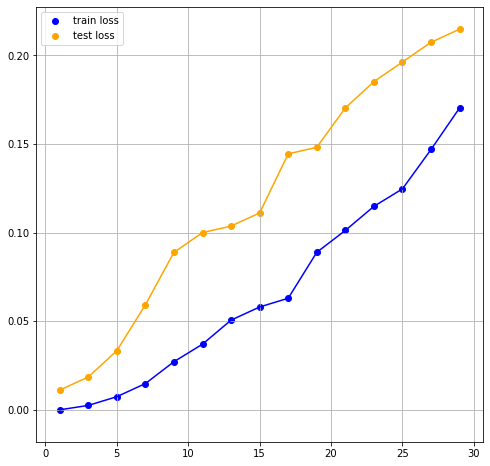

In [28]:

plt.rcParams['figure.figsize'] = (8, 8)

res_train = []
res_test = []

for i in range(len(iter_)):
    res_train.append(np.mean(y_train != y_train_pred[i]))
    res_test.append(np.mean(y_test != y_test_pred[i]))

plt.scatter(list(iter_)[::-1], res_train[::-1], color='blue', label='train loss')
plt.scatter(list(iter_)[::-1], res_test[::-1], color='orange', label='test loss')

plt.plot(list(iter_)[::-1], res_train[::-1], color='blue')
plt.plot(list(iter_)[::-1], res_test[::-1], color='orange')

plt.grid()
plt.legend()
f"best number of neighbors: {np.argmin(res_test)*2 + 1}"

Также построим матрицу ошибок(**confusion matrix**) для лучшего случая(один сосед):

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred[0])

array([[40,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  1,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

Как упоминалось ранее некоторые признаки сильно корелируют. Данный факт может привести к **переобучению метода**.
Так как наш набор данных имеет довольно большое множество признаков(77),
то можно произвести коррекцию данных удалив часть признаков.

In [30]:
corr_matrix = normalize_df.corr().abs()
correct_normalize_df = normalize_df.copy()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
correct_normalize_df = correct_normalize_df.drop(normalize_df[to_drop], axis=1)
correct_normalize_df

,DYRK1A_N,BDNF_N,pAKT_N,pCAMKII_N,pCREB_N,pNR2A_N,pRSK_N,AKT_N,APP_N,SOD1_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,SYP_N,CaNA_N,class_code
0,0.313350,2.253803,-0.344885,-0.899416,0.604281,-0.646044,-0.018664,1.392545,0.804282,-0.617115,...,-1.457889,0.221607,-0.866619,-2.137075,-1.119835,-0.182566,-1.305403,-0.285744,1.065901,0
1,0.357433,1.880415,-0.517992,-0.962530,0.442825,-0.742566,0.035770,1.198308,0.428101,-0.714333,...,-1.121424,0.497507,-0.907006,-2.074347,-1.322118,0.005344,-0.906725,-0.067645,1.280291,0
2,0.335603,2.013063,-0.581163,-0.969347,0.543502,-0.663222,0.373056,1.038480,0.301127,-0.709274,...,-1.197726,0.464494,-0.858927,-2.138655,-1.397250,-0.021831,-1.138611,-0.155059,1.857038,0
3,0.066132,0.802262,-0.247290,-1.070704,-0.171066,-1.101000,0.523365,0.357455,0.095223,-0.706371,...,-1.339051,-0.256932,-1.093307,-1.654497,-1.435423,-0.164318,-1.192887,-0.818989,1.144490,0
4,0.037342,0.805831,-0.482624,-1.084849,-0.627499,-1.166561,0.609699,0.043685,-0.102373,-0.761293,...,-1.316721,-0.054482,-0.889295,-1.669362,-1.391905,0.317194,-0.727242,-0.179502,1.583530,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.686104,-1.302875,-0.515599,-0.814334,-0.161447,-1.152628,-0.301692,-0.346121,-0.533647,0.991506,...,1.169462,-0.906365,1.348176,0.304918,0.128994,1.211184,1.686625,-1.084095,0.085303,7
1076,-0.616453,-1.368257,0.435808,-0.791905,0.115927,-1.079216,-0.415191,-0.291205,-0.717509,1.113535,...,1.762729,-1.099696,1.176319,0.404795,0.089924,1.431283,1.950957,-1.066451,0.084215,7
1077,-0.791202,-1.723681,-0.300726,-1.196458,-0.842506,-1.514796,-0.519663,-1.116885,-1.552958,0.426452,...,2.227840,-0.446799,1.216307,0.823185,0.017164,1.356166,2.214507,-0.360708,0.293525,7
1078,-0.821160,-1.523728,-0.583911,-1.121966,-0.631004,-1.318256,-0.123146,-0.923533,-1.042076,0.557136,...,2.033338,-0.199696,1.472935,1.044632,0.356202,1.490645,2.761775,-0.728860,0.208996,7


Теперь попробуем обучить метод на скорректированном количестве признаков (**41 вместо 77**). И оценим ошибку в сравнении с результатом полученном на полном множестве признаков.

In [31]:
data_x = np.array(correct_normalize_df.drop(['class_code'], axis=1))
data_y = np.array(correct_normalize_df['class_code'])

from sklearn.model_selection import train_test_split
x_train_correct, x_test_correct, y_train_correct, y_test_correct = train_test_split(data_x, data_y, test_size = 0.25, random_state = 42)

f"shape train data {x_train_correct.shape}, shape test data {x_test_correct.shape}"

'shape train data (810, 40), shape test data (270, 40)'

**Ошибка на скорректированных данных:**

In [32]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train_correct, y_train_correct)
y_test_pred_correct = neigh.predict(x_test_correct)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_correct, y_test_pred_correct)

array([[40,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

In [33]:
np.mean(y_test_correct != y_test_pred_correct)

0.003703703703703704

**Ошибка на исходных данных:**

In [34]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train, y_train)
y_test_pred = neigh.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[40,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  1,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

In [35]:
np.mean(y_test != y_test_pred)

0.011111111111111112

## 11. Дополнительные задание
Рассмотрим в качестве дополнительного метода - **метод линейной классификации**. Сначала на данных с коррелируемыми признаками.

In [36]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000, tol=1e-3, alpha=0.001, random_state=42)

clf.fit(x_train, y_train)

у_pred = clf.predict(x_test)
f" error: {np.mean(y_test != у_pred):.3f}"

' error: 0.037'

Второй раз запустим метод после удаления коррелирующих признаков.

In [37]:
clf = SGDClassifier(max_iter=1000, tol=1e-3, alpha=0.001, random_state=42)

clf.fit(x_train_correct, y_train_correct)

у_pred = clf.predict(x_test_correct)
f" error: {np.mean(y_test != у_pred):.3f}"

' error: 0.033'

### Вывод:
После анализа датасета **Mice Protein Expression** можно сделать следующие заключения:
1. Для некоторых признаков корреляция довольно велика
2. Категориальный признак **class** преобразован в новый числовой **class_code**
3. Проведена нормализация признаков
4. Сильно корелирующие признаки удалены для предотвращений переобучения алгоритмов
5. Обучено несколько различных классификаторов с разными параметрами, а именно линейная классификация, метод ближайших соседей
6. Наилучшая точность достигнута на методе ближайших соседей(1 сосед), после корректировки данных

## 12. Применение LDA и PCA
### Визуализация данных
Для обработки данных методом LDA используется библиотека sklearn.

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [39]:
lda = LDA(n_components=2)
lda.fit(x_train_correct, y_train_correct.ravel()).transform(x_train_correct)

x_train_lda = lda.transform(x_train_correct)
x_test_lda = lda.transform(x_test_correct)

In [40]:
data_x_lda = np.array(data.drop(['class'], axis=1))
data_y_lda = np.array(data['class'])

from sklearn.model_selection import train_test_split
_, _, y_train2, y_test2 = train_test_split(data_x_lda, data_y_lda, test_size = 0.25, random_state = 42)


Отобразим результат работы метода с помощью графика, покрасив объект различных классов в соответствующие цвета.

In [41]:
y_train_pd = y_train2.reshape(y_train2.shape[0], 1)
cat = np.concatenate([x_train_lda, y_train_pd], axis=1)

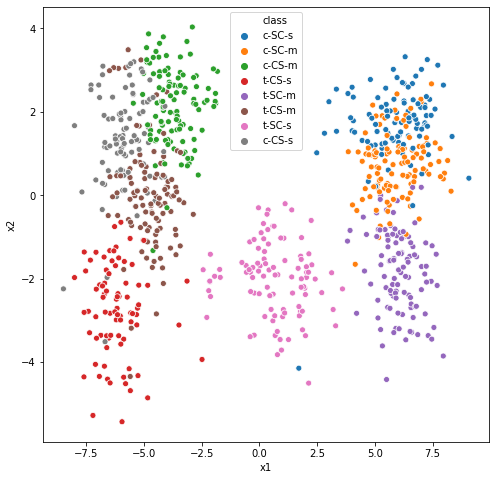

In [42]:
plt.rcParams['figure.figsize'] = (8, 8)

df = pd.DataFrame(data=cat, columns=["x1", 'x2', 'class'])
sns.scatterplot(data=df, x="x1", y="x2", hue="class")

#### PCA
С помощью метода главных компонент были найдены две главные компоненты для визуализации данных.

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x_train_correct)

x_train_pca = pca.transform(x_train_correct)
x_test_pca = pca.transform(x_test_correct)

y_train_pd = y_train2.reshape(y_train2.shape[0], 1)
data = np.concatenate([x_train_pca, y_train_pd], axis=1)

График ниже показывает, что метод лвух главных компонент приводит к довольно плачевному результату. Классы накладываются друг на друг и практически не разделимы между собой.

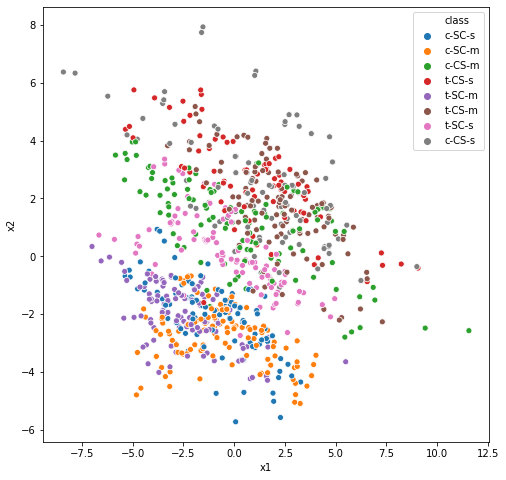

In [44]:
plt.rcParams['figure.figsize'] = (8, 8)

df = pd.DataFrame(data=data, columns=["x1", 'x2', 'class'])
sns.scatterplot(data=df, x="x1", y="x2", hue="class")

### Предобработка данных с помощью PCA для классификатора KNN

Для понижения размерности данных будет использоваться метод главных компонент со всеми возможными вариантами компонент. От 1 до 41 включительно.

In [45]:
from tqdm import tqdm

acc_train = []
acc_test = []

for i in tqdm(range(1, 41)):
    pca = PCA(n_components=i)
    pca.fit(x_train_correct)

    x_train_pca = pca.transform(x_train_correct)
    x_test_pca = pca.transform(x_test_correct)
    
    clf17 = KNeighborsClassifier(n_neighbors=1)
    clf17.fit(x_train_pca, y_train_correct.ravel())
    
    у_pred_train = clf17.predict(x_train_pca)
    у_pred_test = clf17.predict(x_test_pca)
    
    acc_train.append(np.mean(y_train_correct != у_pred_train))
    acc_test.append(np.mean(y_test_correct != у_pred_test))

100%|██████████| 40/40 [00:02<00:00, 16.17it/s]


Как видно из графика,чем выше число компонент тем больше точность. Однако стоит отметить что максимальная точность достигается на **20 компонентах** и дальнейшее их увеличении не целесообразно. Из чего можно сделать вывод что 20 компонент идеально подходит для достижения максимальной точности на **PCA + KNN**.

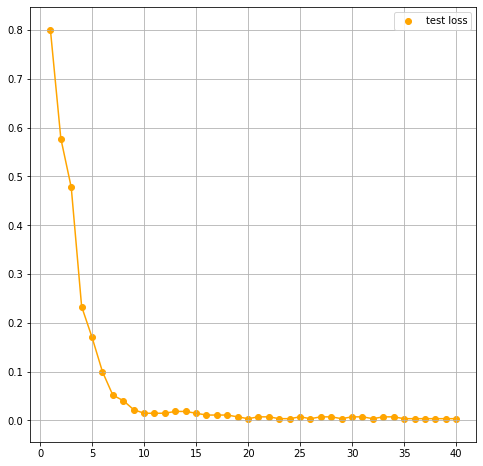

In [46]:
plt.scatter(range(1,41), acc_test, label='test loss', color='orange')
plt.plot(range(1,41), acc_test, color='orange')
plt.legend()
plt.grid()

Для большей наглядности ниже выведена таблица с ошибками метода в зависимости от числа главных компонент.

In [47]:
pd.set_option('display.max_columns', 43)
pd.DataFrame(acc_test, index=range(1,41)).T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,0.8,0.577778,0.477778,0.233333,0.17037,0.1,0.051852,0.040741,0.022222,0.014815,0.014815,0.014815,0.018519,0.018519,0.014815,0.011111,0.011111,0.011111,0.007407,0.003704,0.007407,0.007407,0.003704,0.003704,0.007407,0.003704,0.007407,0.007407,0.003704,0.007407,0.007407,0.003704,0.007407,0.007407,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704


Ниже отображён график с старыми осями координат.

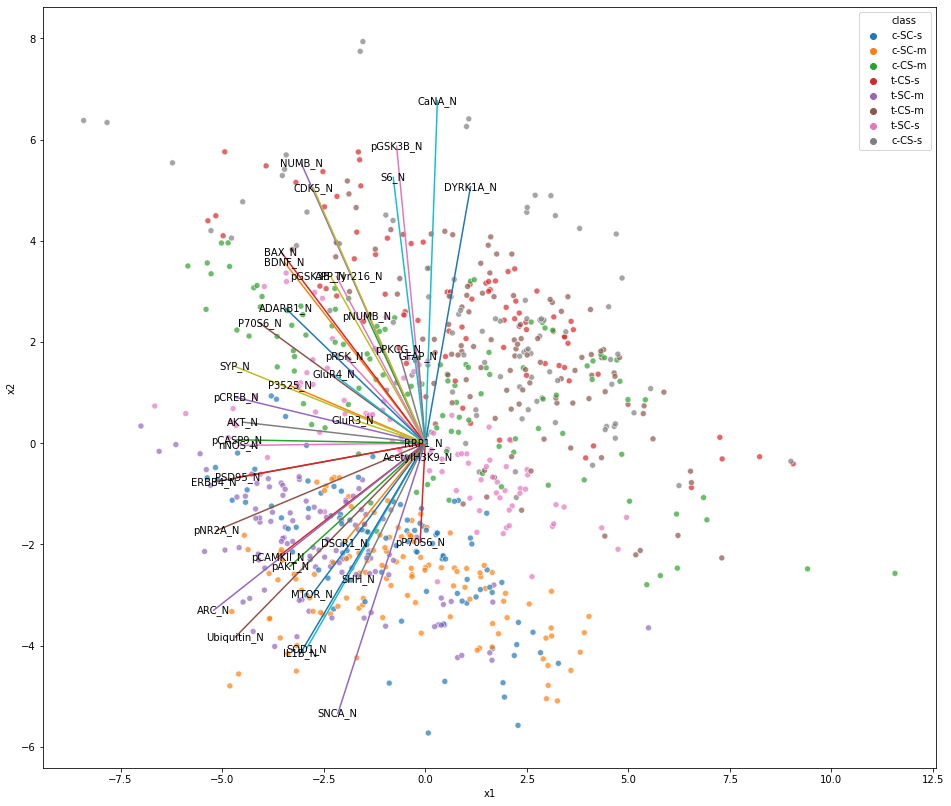

In [49]:
pca = PCA(n_components=2)
pca.fit(x_train_correct)

x_train_pca = pca.transform(x_train_correct)
x_test_pca = pca.transform(x_test_correct)

def component_plot(Xx, y, coeff, labels):
    plt.figure(figsize=(16,14))
    draw = pd.concat([Xx, y], axis=1, join='inner')
    sns.scatterplot(data=draw, x='x1', y='x2', hue='class', alpha=0.7)
    for i in range(0, len(coeff[0])):
        plt.text(coeff[0, i]*20, coeff[1, i]*20, labels[i], color='black', ha='center', va='center')
        plt.plot([0, coeff[0, i]*20], [0, coeff[1, i]*20])
    
    
component_plot(pd.DataFrame(x_train_pca, columns=["x1", 'x2']), pd.DataFrame(y_train2, columns=['class']), pca.components_, correct_normalize_df.columns)

## Выводы после использования методов понижения размерности

Для датасета **Mice Protein Expression** были применены методы **LDA** и **PCA** для понижения размерности. С помощью **PCA** была опробована возможность улучшения точности с помощью понижения размерности для метода **knn**.

1. Метод **LDA** для визуализации данных в одномерном пространстве признаков отлично показал себя на данном датасете. Визуально классы практически полностью чётко различимы.

2. Использование метода главных компонент напротив не позволяет хорошо визуализировать данные.

3. **PCA** не позволяет улучшить точность алгоритма **knn**.

4. При использовании **20** главных компонент точность достигает своего максимума.